In [1]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
median_days_to_close_csv = 'Resources_Clean/clean_median_days_to_close_week_all.csv'
mean_days_to_close_csv = 'Resources_Clean/clean_mean_days_to_close_week_all.csv'
median_days_pending_csv = 'Resources_Clean/clean_median_days_pending_week_all.csv'
mean_days_pending_csv = 'Resources_Clean/clean_mean_days_pending_week_all.csv'

median_days_to_close_df = pd.read_csv(median_days_to_close_csv)
mean_days_to_close_df = pd.read_csv(mean_days_to_close_csv)
median_days_to_pending_df = pd.read_csv(median_days_pending_csv)
mean_days_to_pending_df = pd.read_csv(mean_days_pending_csv)

In [3]:
median_days_to_close_df.head()

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Days to Close,Median Days to Close Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,35.0,NaN
1,102001,0,United States,country,NaN,2018-01-13,35.0,NaN
2,102001,0,United States,country,NaN,2018-01-20,37.0,35.666667
3,102001,0,United States,country,NaN,2018-01-27,35.0,35.666667
4,102001,0,United States,country,NaN,2018-02-03,33.0,35.000000


In [4]:
mean_days_to_close_df.head()

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,New Listings Count,New Listings Count Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,39.0,NaN
1,102001,0,United States,country,NaN,2018-01-13,39.0,NaN
2,102001,0,United States,country,NaN,2018-01-20,39.0,39.000000
3,102001,0,United States,country,NaN,2018-01-27,38.0,38.666667
4,102001,0,United States,country,NaN,2018-02-03,36.0,37.666667


In [5]:
median_days_to_pending_df.head()

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Median Days Pending,Median Days Pending Rolling Avg
0,394913,1,"New York, NY",msa,NY,2018-01-06,84.0,NaN
1,394913,1,"New York, NY",msa,NY,2018-01-13,87.0,NaN
2,394913,1,"New York, NY",msa,NY,2018-01-20,86.0,85.666667
3,394913,1,"New York, NY",msa,NY,2018-01-27,94.0,89.000000
4,394913,1,"New York, NY",msa,NY,2018-02-03,78.0,86.000000


In [6]:
mean_days_to_pending_df.head()

,Region ID,Size Rank,Region Name,Region Type,State Name,Date,Mean Days Pending,Mean Days Pending Rolling Avg
0,394913,1,"New York, NY",msa,NY,2018-01-06,71.0,NaN
1,394913,1,"New York, NY",msa,NY,2018-01-13,73.0,NaN
2,394913,1,"New York, NY",msa,NY,2018-01-20,71.0,71.666667
3,394913,1,"New York, NY",msa,NY,2018-01-27,76.0,73.333333
4,394913,1,"New York, NY",msa,NY,2018-02-03,73.0,73.333333


In [7]:
days_to_close_df = pd.merge(median_days_to_close_df, mean_days_to_close_df, on=['Region Name', 'Date'])
days_to_close_df.head()

,Region ID_x,Size Rank_x,Region Name,Region Type_x,State Name_x,Date,Median Days to Close,Median Days to Close Rolling Avg,Region ID_y,Size Rank_y,Region Type_y,State Name_y,New Listings Count,New Listings Count Rolling Avg
0,102001,0,United States,country,NaN,2018-01-06,35.0,NaN,102001,0,country,NaN,39.0,NaN
1,102001,0,United States,country,NaN,2018-01-13,35.0,NaN,102001,0,country,NaN,39.0,NaN
2,102001,0,United States,country,NaN,2018-01-20,37.0,35.666667,102001,0,country,NaN,39.0,39.000000
3,102001,0,United States,country,NaN,2018-01-27,35.0,35.666667,102001,0,country,NaN,38.0,38.666667
4,102001,0,United States,country,NaN,2018-02-03,33.0,35.000000,102001,0,country,NaN,36.0,37.666667


In [8]:
days_to_pending_df = pd.merge(median_days_to_pending_df, mean_days_to_pending_df, on=['Region Name', 'Date'])
days_to_pending_df.head()

,Region ID_x,Size Rank_x,Region Name,Region Type_x,State Name_x,Date,Median Days Pending,Median Days Pending Rolling Avg,Region ID_y,Size Rank_y,Region Type_y,State Name_y,Mean Days Pending,Mean Days Pending Rolling Avg
0,394913,1,"New York, NY",msa,NY,2018-01-06,84.0,NaN,394913,1,msa,NY,71.0,NaN
1,394913,1,"New York, NY",msa,NY,2018-01-13,87.0,NaN,394913,1,msa,NY,73.0,NaN
2,394913,1,"New York, NY",msa,NY,2018-01-20,86.0,85.666667,394913,1,msa,NY,71.0,71.666667
3,394913,1,"New York, NY",msa,NY,2018-01-27,94.0,89.000000,394913,1,msa,NY,76.0,73.333333
4,394913,1,"New York, NY",msa,NY,2018-02-03,78.0,86.000000,394913,1,msa,NY,73.0,73.333333


In [11]:
pending_reduced = days_to_pending_df[['Region ID_x',
                             'Size Rank_x',
                             'Region Name',
                             'Region Type_x',
                             'State Name_x',
                             'Date', 
                             'Median Days Pending',
                             'Median Days Pending Rolling Avg',
                             'Mean Days Pending',
                             'Mean Days Pending Rolling Avg']]

pending_reduced = days_to_pending_df.rename(columns={'Region ID_x': 'Region Id',
                                              'Size Rank_x': 'Size Rank',
                                              'Region Type_x': 'Region Type',
                                              'State Name_x': 'State Name'})

days_to_pending_df['Delta']=pending_reduced['Median Days Pending']-pending_reduced['Mean Days Pending']
days_to_pending_df

,Region ID_x,Size Rank_x,Region Name,Region Type_x,State Name_x,Date,Median Days Pending,Median Days Pending Rolling Avg,Region ID_y,Size Rank_y,Region Type_y,State Name_y,Mean Days Pending,Mean Days Pending Rolling Avg,Delta
0,394913,1,"New York, NY",msa,NY,2018-01-06,84.0,NaN,394913,1,msa,NY,71.0,NaN,13.0
1,394913,1,"New York, NY",msa,NY,2018-01-13,87.0,NaN,394913,1,msa,NY,73.0,NaN,14.0
2,394913,1,"New York, NY",msa,NY,2018-01-20,86.0,85.666667,394913,1,msa,NY,71.0,71.666667,15.0
3,394913,1,"New York, NY",msa,NY,2018-01-27,94.0,89.000000,394913,1,msa,NY,76.0,73.333333,18.0
4,394913,1,"New York, NY",msa,NY,2018-02-03,78.0,86.000000,394913,1,msa,NY,73.0,73.333333,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10060,395009,237,"Punta Gorda, FL",msa,FL,2023-10-07,39.0,37.333333,395009,237,msa,FL,69.0,76.000000,-30.0
10061,395009,237,"Punta Gorda, FL",msa,FL,2023-10-14,35.0,35.333333,395009,237,msa,FL,59.0,71.666667,-24.0
10062,395009,237,"Punta Gorda, FL",msa,FL,2023-10-21,32.0,35.333333,395009,237,msa,FL,61.0,63.000000,-29.0
10063,395009,237,"Punta Gorda, FL",msa,FL,2023-10-28,33.0,33.333333,395009,237,msa,FL,69.0,63.000000,-36.0


In [13]:
column_data_types = pending_reduced.dtypes
print(column_data_types)

Region Id                            int64
Size Rank                            int64
Region Name                         object
Region Type                         object
State Name                          object
Date                                object
Median Days Pending                float64
Median Days Pending Rolling Avg    float64
Region ID_y                          int64
Size Rank_y                          int64
Region Type_y                       object
State Name_y                        object
Mean Days Pending                  float64
Mean Days Pending Rolling Avg      float64
Delta                              float64
dtype: object


In [16]:
pending_reduced['Date'] = pd.to_datetime(pending_reduced['Date'])

In [17]:
print(column_data_types)

Region Id                            int64
Size Rank                            int64
Region Name                         object
Region Type                         object
State Name                          object
Date                                object
Median Days Pending                float64
Median Days Pending Rolling Avg    float64
Region ID_y                          int64
Size Rank_y                          int64
Region Type_y                       object
State Name_y                        object
Mean Days Pending                  float64
Mean Days Pending Rolling Avg      float64
Delta                              float64
dtype: object


In [18]:
pending_top_size = pending_reduced.loc[pending_reduced['Size Rank'] < 10]

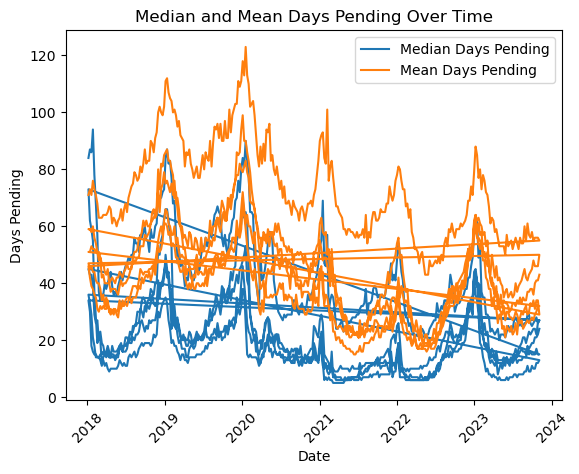

In [19]:
plt.plot(pending_top_size['Date'], pending_top_size['Median Days Pending'], label='Median Days Pending')

# Plotting Mean Days to Close
plt.plot(pending_top_size['Date'], pending_top_size['Mean Days Pending'], label='Mean Days Pending')

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Days Pending')
plt.title('Median and Mean Days Pending Over Time')

# Adding legend
plt.legend()

# Rotating x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

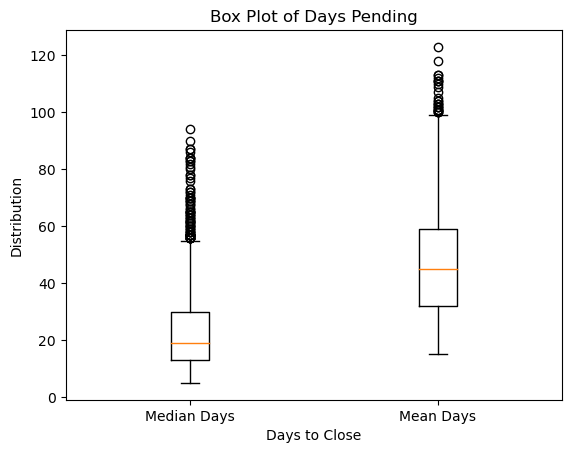

In [20]:
plt.boxplot([pending_top_size['Median Days Pending'], pending_top_size['Mean Days Pending']], labels=['Median Days', 'Mean Days'])

# Adding labels and title
plt.xlabel('Days to Close')
plt.ylabel('Distribution')
plt.title('Box Plot of Days Pending')

# Display the plot
plt.show()

In [21]:
plt.boxplot(close_reduced['Delta'], labels=['Delta'])

# Adding labels and title

plt.ylabel('Distribution')
plt.title('Box Plot of Median-Mean Delta')

# Display the plot
plt.show()

NameError: name 'close_reduced' is not defined

In [ ]:
merged_top_size.pivot(index='Date', columns='Region Name', values='Median Sale to List Ratio').plot(kind='line')
plt.title('Median Sale to List Ratio Over Time by Region')
plt.xlabel('Date')
plt.ylabel('Sale to List Ratio')
plt.legend(title='Region Name', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.show()

In [ ]:
correlation = merged_reduced['Median Sale to List Ratio'].corr(merged_reduced['Median Days to Pending'])

print(f"Correlation between Median Sale to List Ratio and Median Days to Pending: {correlation}")

In [ ]:
# Selecting columns for linear regression
x = merged_reduced['Median Days to Pending']
y = merged_reduced['Median Sale to List Ratio']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared: {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

In [ ]:
plt.scatter(merged_reduced['Median Days to Pending'], merged_reduced['Median Sale to List Ratio'], alpha=0.5)
plt.title('Scatter Plot: Median Days to Pending vs. Median Sale to List Ratio')
plt.xlabel('Median Days to Pending')
plt.ylabel('Median Sale to List Ratio')
plt.show()

In [ ]:
plt.scatter(merged_top_size['Median Days to Pending'], merged_top_size['Median Sale to List Ratio'], alpha=0.5)
plt.title('Scatter Plot: Median Days to Pending vs. Median Sale to List Ratio')
plt.xlabel('Median Days to Pending')
plt.ylabel('Median Sale to List Ratio')
plt.show()

In [ ]:
plt.scatter(merged_top_size['Median Days to Close'], merged_top_size['Median Sale to List Ratio'], alpha=0.5)
plt.title('Scatter Plot: Median Days to Close vs. Median Sale to List Ratio')
plt.xlabel('Median Days to Close')
plt.ylabel('Median Sale to List Ratio')
plt.show()